# MOST POPULAR R packages

## URL displaying +/- incorrect CRAN "most popular" R packages

In [5]:
## http://www.r-bloggers.com/popularity-bigdata-large-data-packages-in-r-and-ffbase-user-presentation/
## http://blog.revolutionanalytics.com/2015/06/working-with-the-rstudio-cran-logs.html
## http://www.kdnuggets.com/2015/06/top-20-r-packages.html

### Useful links for the project

In [6]:
## https://cran.r-project.org/
## http://cran-logs.rstudio.com/
## http://www.r-bloggers.com/differences-in-the-network-structure-of-cran-and-bioconductor/

### Useful linux cmd for the project

In [7]:
# scp filename name@remote:cran/
# scp name@remote:cran/filename .

# top (to see activity on cpu)

# nohup spark-submit your_code.py & (to let the prog run in the background)

# spark-submit file.py

## Load usual python packages and general definitions

In [8]:
import numpy as np
import pandas as pd
%matplotlib  inline
import matplotlib.pyplot as plt

In [9]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re

In [364]:

## users are downloading packages and some additional packages are downloaded with. In order to eliminate the add packages, 
## we need to know the package dependants and which ones are imported. The analysis will allow to extract all the packages 
## that are popular by removing the dependancies.


## Steps:

# 1. Packages available in R + dependancy matrix construction:
## scrap Cran website to retrive all packages and additional info => done
## build a Depends matrix (+Spark parallelisation) => done
## build a Reverse matrix (+Spark parallelisation) => done
## check if Depends and Reverse matrix are compatible (unlikely) => combined results =>done

# 2. CRAN package download logs
## download all logs of download by users on disk (+Spark parallelisation) => done
## retrive relevant info from logs and generate unique ID (date+ip) => done
## save the info from logs into SQL database => draft

# 3. Process logs with dependency matrix to extract "root" packages
## use script to generate unique ID to generate list of downloaded packages by unique ID
## use matrix to simplify list generated above to get "root" packages


In [365]:
### save in file definition
def cleanfile():
    # 'a' to add line to txt file
    with open('data/mtaRealTime.txt', 'w'): pass


In [366]:
### save in file definition
def savefile(listitems):
    # 'a' to add line to txt file
    file_path = 'data/'+filename+'.txt'
    with open(file_path, 'a') as f:
            f.write(listitems + '\n')

## 1. Scrap CRAN Website to retrieve all packages and construct dependancy matrix

### 1.a. retrieve all packages from CRAN website and relevant information on each package web page

In [367]:
## first part

## we need to scrap the cran project website to get the dependant and acsendant of every package. 

In [368]:
#definition of extracting function 

def extract_url_content(urlv):
        # Request by url and headers
        headers=None
        req =  requests.get(urlv, headers=headers)
        demande = req.text
        # Request status code
        statut_demande = req.status_code
        if statut_demande/100 in [4,5]:
            return 'error on requests with error: ', statut_demande
        return BeautifulSoup(demande)

In [369]:
# After some research, it look like the following link contains all the package links:

# https://cran.r-project.org/web/packages/available_packages_by_name.html

In [370]:
url = 'https://cran.r-project.org/web/packages/available_packages_by_name.html'
headers = None

In [371]:
texturl= extract_url_content(url)
print texturl.prettify

<bound method BeautifulSoup.prettify of <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>CRAN Packages By Name</title>
<link href="../CRAN_web.css" rel="stylesheet" type="text/css"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<style type="text/css">
  table td { vertical-align: top; }
</style>
</head>
<body lang="en">
<h1>Available CRAN Packages By Name</h1>
<p style="text-align: center">
<a href="#available-packages-A">A</a>
<a href="#available-packages-B">B</a>
<a href="#available-packages-C">C</a>
<a href="#available-packages-D">D</a>
<a href="#available-packages-E">E</a>
<a href="#available-packages-F">F</a>
<a href="#available-packages-G">G</a>
<a href="#available-packages-H">H</a>
<a href="#available-packages-I">I</a>
<a href="#available-packages-J">J</a>
<a href="#available-packages-K">K</a>
<a href="#available-packages-L">L</a>
<a href

In [372]:
Delaystext = texturl.find_all('a')
print Delaystext

[<a href="#available-packages-A">A</a>, <a href="#available-packages-B">B</a>, <a href="#available-packages-C">C</a>, <a href="#available-packages-D">D</a>, <a href="#available-packages-E">E</a>, <a href="#available-packages-F">F</a>, <a href="#available-packages-G">G</a>, <a href="#available-packages-H">H</a>, <a href="#available-packages-I">I</a>, <a href="#available-packages-J">J</a>, <a href="#available-packages-K">K</a>, <a href="#available-packages-L">L</a>, <a href="#available-packages-M">M</a>, <a href="#available-packages-N">N</a>, <a href="#available-packages-O">O</a>, <a href="#available-packages-P">P</a>, <a href="#available-packages-Q">Q</a>, <a href="#available-packages-R">R</a>, <a href="#available-packages-S">S</a>, <a href="#available-packages-T">T</a>, <a href="#available-packages-U">U</a>, <a href="#available-packages-V">V</a>, <a href="#available-packages-W">W</a>, <a href="#available-packages-X">X</a>, <a href="#available-packages-Y">Y</a>, <a href="#available-pack

In [373]:
end_of_url = []
for link in Delaystext:
    end_of_url.append(link.get('href'))
end_of_url

['#available-packages-A',
 '#available-packages-B',
 '#available-packages-C',
 '#available-packages-D',
 '#available-packages-E',
 '#available-packages-F',
 '#available-packages-G',
 '#available-packages-H',
 '#available-packages-I',
 '#available-packages-J',
 '#available-packages-K',
 '#available-packages-L',
 '#available-packages-M',
 '#available-packages-N',
 '#available-packages-O',
 '#available-packages-P',
 '#available-packages-Q',
 '#available-packages-R',
 '#available-packages-S',
 '#available-packages-T',
 '#available-packages-U',
 '#available-packages-V',
 '#available-packages-W',
 '#available-packages-X',
 '#available-packages-Y',
 '#available-packages-Z',
 '../../web/packages/A3/index.html',
 '../../web/packages/abbyyR/index.html',
 '../../web/packages/abc/index.html',
 '../../web/packages/ABCanalysis/index.html',
 '../../web/packages/abc.data/index.html',
 '../../web/packages/abcdeFBA/index.html',
 '../../web/packages/ABCoptim/index.html',
 '../../web/packages/abcrf/index.

In [374]:
end_of_url[26][6:]

'web/packages/A3/index.html'

In [375]:
len(end_of_url)

7081

In [376]:
#1. build a list of url for each package:

packages_url = []
for link in end_of_url[26:]:  ## not interested by alphabetic categories
    packages_url.append('https://cran.r-project.org/'+link[6:]) ## concatene end_of_url with the start of the url in order to later download the information about the packages
packages_url

['https://cran.r-project.org/web/packages/A3/index.html',
 'https://cran.r-project.org/web/packages/abbyyR/index.html',
 'https://cran.r-project.org/web/packages/abc/index.html',
 'https://cran.r-project.org/web/packages/ABCanalysis/index.html',
 'https://cran.r-project.org/web/packages/abc.data/index.html',
 'https://cran.r-project.org/web/packages/abcdeFBA/index.html',
 'https://cran.r-project.org/web/packages/ABCoptim/index.html',
 'https://cran.r-project.org/web/packages/abcrf/index.html',
 'https://cran.r-project.org/web/packages/abctools/index.html',
 'https://cran.r-project.org/web/packages/abd/index.html',
 'https://cran.r-project.org/web/packages/abf2/index.html',
 'https://cran.r-project.org/web/packages/abind/index.html',
 'https://cran.r-project.org/web/packages/abn/index.html',
 'https://cran.r-project.org/web/packages/abundant/index.html',
 'https://cran.r-project.org/web/packages/acc/index.html',
 'https://cran.r-project.org/web/packages/accelerometry/index.html',
 'http

In [377]:

# save list of package url on disk in text file
with open('list_package_url.txt', 'w'): pass ## clean file

with open("list_package_url.txt", 'a') as f:
    for item in packages_url:
        f.write("%s\n" % item)


In [378]:
data = [line.strip() for line in open("list_package_url.txt", 'r')]
data[:5]

['https://cran.r-project.org/web/packages/A3/index.html',
 'https://cran.r-project.org/web/packages/abbyyR/index.html',
 'https://cran.r-project.org/web/packages/abc/index.html',
 'https://cran.r-project.org/web/packages/ABCanalysis/index.html',
 'https://cran.r-project.org/web/packages/abc.data/index.html']

In [379]:
len(packages_url)

7055

In [380]:
#2 extract with beautiful soup using one example from list of url
url_package = 'https://cran.r-project.org/web/packages/mgcv/index.html'
headers = None

textpackageindex= extract_url_content(url_package)
#print textpackageindex.prettify


In [381]:
textpackage = textpackageindex.find_all('tr')
print textpackage

[<tr>
<td>Version:</td>
<td>1.8-7</td>
</tr>, <tr>
<td>Priority:</td>
<td>recommended</td>
</tr>, <tr>
<td>Depends:</td>
<td>R (≥ 2.14.0), <a href="../nlme/index.html">nlme</a> (≥ 3.1-64)</td>
</tr>, <tr>
<td>Imports:</td>
<td>methods, stats, graphics, <a href="../Matrix/index.html">Matrix</a></td>
</tr>, <tr>
<td>Suggests:</td>
<td>splines, parallel, <a href="../survival/index.html">survival</a>, <a href="../MASS/index.html">MASS</a></td>
</tr>, <tr>
<td>Published:</td>
<td>2015-07-23</td>
</tr>, <tr>
<td>Author:</td>
<td>Simon Wood</td>
</tr>, <tr>
<td>Maintainer:</td>
<td>Simon Wood  &lt;simon.wood at r-project.org&gt;</td>
</tr>, <tr>
<td>License:</td>
<td><a href="../../licenses/GPL-2">GPL-2</a> | <a href="../../licenses/GPL-3">GPL-3</a> [expanded from: GPL (≥ 2)]</td>
</tr>, <tr>
<td>NeedsCompilation:</td>
<td>yes</td>
</tr>, <tr>
<td>Citation:</td>
<td><a href="citation.html">mgcv citation info</a> </td>
</tr>, <tr>
<td>Materials:</td>
<td><a href="ChangeLog">ChangeLog</a> </td>

In [382]:
# extract text
textPackageIndex = []
for part in textpackage:
    textPackageIndex.append(part.get_text())
textPackageIndex

[u'\nVersion:\n1.8-7\n',
 u'\nPriority:\nrecommended\n',
 u'\nDepends:\nR (\u2265 2.14.0), nlme (\u2265 3.1-64)\n',
 u'\nImports:\nmethods, stats, graphics, Matrix\n',
 u'\nSuggests:\nsplines, parallel, survival, MASS\n',
 u'\nPublished:\n2015-07-23\n',
 u'\nAuthor:\nSimon Wood\n',
 u'\nMaintainer:\nSimon Wood  <simon.wood at r-project.org>\n',
 u'\nLicense:\nGPL-2 | GPL-3 [expanded from: GPL (\u2265 2)]\n',
 u'\nNeedsCompilation:\nyes\n',
 u'\nCitation:\nmgcv citation info \n',
 u'\nMaterials:\nChangeLog \n',
 u'\nIn\xa0views:\nBayesian, Econometrics, Environmetrics, SocialSciences\n',
 u'\nCRAN\xa0checks:\nmgcv results\n',
 u'\n Reference\xa0manual: \n  mgcv.pdf  \n',
 u'\n Package\xa0source: \n  mgcv_1.8-7.tar.gz  \n',
 u'\n Windows\xa0binaries: \n r-devel: mgcv_1.8-7.zip, r-release: mgcv_1.8-7.zip, r-oldrel: mgcv_1.8-7.zip \n',
 u'\n OS\xa0X\xa0Snow\xa0Leopard\xa0binaries: \n r-release: mgcv_1.8-7.tgz, r-oldrel: mgcv_1.8-6.tgz \n',
 u'\n OS\xa0X\xa0Mavericks\xa0binaries: \n r-relea

In [383]:
## regex test to retrieve relevant information from webpages

package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', url_package)
package_name2 = package_name.group()
#print header2
package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
print package_name3

depends = re.search('Depends:\\n.*|Imports:\\n.*', textPackageIndex[3])
depends2 = depends.group()
#print header2
depends3 = re.sub('(Depends:\n)|\([^)]*\)| |(Imports:\n)','',depends2)
depends4 = depends3.split(',')
print depends3
print depends4

imports = re.search('(Reverse\\xa0depends:\n+.+)|(Reverse\\xa0imports:\n+.+)', textPackageIndex[21])
imports2 = imports.group()
print 'rrrr', imports2
imports3 = re.sub('(Reverse\\xa0depends:\n)|\([^)]*\)|(Reverse\\xa0imports:\n)','',imports2)
imports4 = imports3.split(',')
print 'toto' , imports3
print imports4

mgcv
methods,stats,graphics,Matrix
[u'methods', u'stats', u'graphics', u'Matrix']
rrrr Reverse imports:
AdaptFitOS, analogue, apsimr, car, cSFM, demography, discSurv, drsmooth, DSpat, ez, FDboost, fRegression, funreg, FWDselect, gamclass, groc, gsg, Haplin, HLMdiag, landsat, LMERConvenienceFunctions, mirt, mrds, openair, palaeoSig, pitchRx, QRM, QuasiSeq, RcmdrPlugin.HH, refund, reldist, rioja, rlme, RLRsim, rstpm2, secr, SEERaBomb, sesem, simPH, slp, snht, spatstat, spsmooth, StatDA, tripEstimation, tsDyn, vegan, vows, WhiteStripe, zetadiv
toto AdaptFitOS, analogue, apsimr, car, cSFM, demography, discSurv, drsmooth, DSpat, ez, FDboost, fRegression, funreg, FWDselect, gamclass, groc, gsg, Haplin, HLMdiag, landsat, LMERConvenienceFunctions, mirt, mrds, openair, palaeoSig, pitchRx, QRM, QuasiSeq, RcmdrPlugin.HH, refund, reldist, rioja, rlme, RLRsim, rstpm2, secr, SEERaBomb, sesem, simPH, slp, snht, spatstat, spsmooth, StatDA, tripEstimation, tsDyn, vegan, vows, WhiteStripe, zetadiv
[u'Ad

In [384]:
# text is cleaned and the package "depends" are stored in a list
depends = re.search('(Depends:\n.*)|(Imports:\n.*)', textPackageIndex[3]) 
depends2 = depends.group()
#print header2
depends3 = re.sub('(Depends:\n)|\([^)]*\)|(Imports:\n)','',depends2)
depends4 = depends3.split(',')
print depends4

[u'methods', u' stats', u' graphics', u' Matrix']


In [385]:
re.search('(Depends:\n.*)|(Imports:\n.*)', textPackageIndex[2]).group()

u'Depends:\nR (\u2265 2.14.0), nlme (\u2265 3.1-64)'

In [ ]:
re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', textPackageIndex[19]).group()

In [ ]:
# numpy sparce matrix
# Given the size of ~7000 x ~7000 matrix that we need to obtain, 
# we can use the sparce matrix fct to write it since we have plenty of 0

In [387]:
list_packages=[]
for i in packages_url:
    package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', i)
    package_name2 = package_name.group()
    #print header2
    package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
    list_packages.append(package_name3)
list_packages

['A3',
 'abbyyR',
 'abc',
 'ABCanalysis',
 'abc.data',
 'abcdeFBA',
 'ABCoptim',
 'abcrf',
 'abctools',
 'abd',
 'abf2',
 'abind',
 'abn',
 'abundant',
 'acc',
 'accelerometry',
 'AcceptanceSampling',
 'ACCLMA',
 'accrual',
 'accrued',
 'ACD',
 'ACDm',
 'acepack',
 'acid',
 'acm4r',
 'acmeR',
 'ACNE',
 'acnr',
 'acopula',
 'acp',
 'aCRM',
 'acs',
 'acss',
 'acss.data',
 'ACTCD',
 'Actigraphy',
 'activity',
 'actuar',
 'ActuDistns',
 'ada',
 'adabag',
 'adagio',
 'adaptDA',
 'AdaptFit',
 'AdaptFitOS',
 'AdaptiveSparsity',
 'adaptivetau',
 'adaptMCMC',
 'adaptsmoFMRI',
 'adaptTest',
 'addhazard',
 'additivityTests',
 'addreg',
 'ADDT',
 'ade4',
 'ade4TkGUI',
 'adegenet',
 'adegraphics',
 'adehabitat',
 'adehabitatHR',
 'adehabitatHS',
 'adehabitatLT',
 'adehabitatMA',
 'adephylo',
 'AdequacyModel',
 'ADGofTest',
 'adhoc',
 'adimpro',
 'adlift',
 'ADM3',
 'AdMit',
 'ADPclust',
 'ads',
 'adwave',
 'aemo',
 'AER',
 'afex',
 'AFLPsim',
 'aftgee',
 'AGD',
 'agop',
 'agRee',
 'Agreement',
 'ag

In [388]:
len(list_packages)

7055

In [389]:
list_packages = np.array(list_packages)
list_packages

array(['A3', 'abbyyR', 'abc', ..., 'ZRA', 'ztable', 'zyp'], 
      dtype='|S27')

In [390]:

## Definition of two dictionaries to store the packaged and their index and be able to go back and force between Index and value

listPackages_indexto_Value = {}
listPackages_valueto_index = {}
for i in range(len(list_packages)):
    listPackages_indexto_Value[i] =  list_packages[i]
    listPackages_valueto_index[list_packages[i]]=i

In [391]:
listPackages_indexto_Value

{0: 'A3',
 1: 'abbyyR',
 2: 'abc',
 3: 'ABCanalysis',
 4: 'abc.data',
 5: 'abcdeFBA',
 6: 'ABCoptim',
 7: 'abcrf',
 8: 'abctools',
 9: 'abd',
 10: 'abf2',
 11: 'abind',
 12: 'abn',
 13: 'abundant',
 14: 'acc',
 15: 'accelerometry',
 16: 'AcceptanceSampling',
 17: 'ACCLMA',
 18: 'accrual',
 19: 'accrued',
 20: 'ACD',
 21: 'ACDm',
 22: 'acepack',
 23: 'acid',
 24: 'acm4r',
 25: 'acmeR',
 26: 'ACNE',
 27: 'acnr',
 28: 'acopula',
 29: 'acp',
 30: 'aCRM',
 31: 'acs',
 32: 'acss',
 33: 'acss.data',
 34: 'ACTCD',
 35: 'Actigraphy',
 36: 'activity',
 37: 'actuar',
 38: 'ActuDistns',
 39: 'ada',
 40: 'adabag',
 41: 'adagio',
 42: 'adaptDA',
 43: 'AdaptFit',
 44: 'AdaptFitOS',
 45: 'AdaptiveSparsity',
 46: 'adaptivetau',
 47: 'adaptMCMC',
 48: 'adaptsmoFMRI',
 49: 'adaptTest',
 50: 'addhazard',
 51: 'additivityTests',
 52: 'addreg',
 53: 'ADDT',
 54: 'ade4',
 55: 'ade4TkGUI',
 56: 'adegenet',
 57: 'adegraphics',
 58: 'adehabitat',
 59: 'adehabitatHR',
 60: 'adehabitatHS',
 61: 'adehabitatLT',
 6

In [392]:
list_packages=[]
# save dictionary on disk in text file
with open('dict_Packages_indexto_Value.txt', 'w'): pass ## clean file

with open("dict_Packages_indexto_Value.txt", 'a') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in listPackages_indexto_Value.items()]


In [393]:
import csv
reader = csv.reader(open('dict_Packages_indexto_Value.txt', 'rb'))
mydict1 = dict(x for x in reader)

In [394]:
#mydict

In [395]:
len(mydict1)

7055

In [396]:
listPackages_valueto_index

{'poisDoubleSamp': 4519,
 'plspm': 4484,
 'TSTutorial': 6745,
 'RFGLS': 5184,
 'spiders': 6198,
 'Rblpapi': 4925,
 'xts': 7018,
 'Grid2Polygons': 2383,
 'bigmemory': 450,
 'BSDA': 620,
 'flashClust': 1931,
 'soiltexture': 6064,
 'lordif': 3208,
 'GESTr': 2221,
 'rNOMADS': 5367,
 'cslogistic': 1109,
 'MetaPCA': 3458,
 'MRsurv': 3727,
 'ggmcmc': 2240,
 'delt': 1249,
 'SIMMS': 5925,
 'cranlogs': 1075,
 'epiDisplay': 1664,
 'chemosensors': 781,
 'rgeolocate': 5216,
 'scholar': 5705,
 'sdcTable': 5739,
 'smdata': 5999,
 'rHpcc': 5240,
 'source.gist': 6091,
 'icaOcularCorrection': 2691,
 'glasso': 2270,
 'WikipediaR': 6949,
 'BLCOP': 525,
 'labdsv': 2998,
 'qmethod': 4748,
 'rAvis': 4913,
 'missMDA': 3556,
 'scrapeR': 5726,
 'sysfonts': 6470,
 'fossil': 1983,
 'GCPM': 2134,
 'dcGOR': 1213,
 'visreg': 6875,
 'SoftClustering': 6057,
 'RGCCA': 5209,
 'ParamHelpers': 4233,
 'sscor': 6251,
 'TurtleGraphics': 6763,
 'emplik': 1624,
 'Density.T.HoldOut': 1265,
 'reports': 5150,
 'reportr': 5148,
 '

In [397]:

# save dictionary on disk in text file
with open('dictPackages_valueToIndex.txt', 'w'): pass ## clean file
with open("dictPackages_valueToIndex.txt", 'a') as f:
    [f.write('{0},{1}\n'.format(key, value)) for key, value in listPackages_valueto_index.items()]


In [398]:
import csv
reader = csv.reader(open('dictPackages_valueToIndex.txt', 'rb'))
listPackages_valueto_index2 = dict(x for x in reader)

In [399]:
len(listPackages_valueto_index2)

7055

In [400]:
listPackages_valueto_index2['A3']

'0'

### 1.b. Build a dependant "Depends" and a "Reverse" matrix with all packages (sparce mat)

In [163]:
## fonction to convert "depends" into columns numbers

depends_row = []
depends_col = []
depends_data = []

#for j in range(len(list_packages))
j = 0
new_items = 0
for i in imports4:
    try: 
        toto = listPackages_valueto_index[i]
        print toto
        depends_col.append(toto)
        print depends_col
        new_items +=1
    except:
        0
    depends_row = [j for i in range(new_items)]
    depends_data = np.ones(new_items)
    
print depends_row, depends_col,depends_data

44
[44]
[0] [44] [ 1.]


In [72]:
# set up of the 3 tables into np array to prepare the sparce matrix:
depends_row = np.array(depends_row)
depends_col = np.array(depends_col)
depends_data = np.array(depends_data)

In [73]:
# Build a full matrix using coo_matrix scipy package

from scipy.sparse import coo_matrix
a = coo_matrix((depends_data, (depends_row, depends_col)), shape=(8000,8000)).toarray()
a

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [74]:
a[2].sum(0)

0.0

In [401]:
## build the depends matrix from the web scraping:

# definition of list that will serve to built a sparce matrix
depends_row = []
depends_col = []
depends_data = []

j=0

for url_link in packages_url[:7]:
    
    # web scraping of the link using beautiful soup
    headers = None
    textpackageindex= extract_url_content(url_link)
    #print textpackageindex.prettify
    
    # extract all tag tr
    textpackage = textpackageindex.find_all('tr')
    #print textpackage
    
    # extract text from in the tr tag
    textPackageIndex = []
    for part in textpackage:
        textPackageIndex.append(part.get_text())
    #print textPackageIndex
    
    # determine where the 'depends' information is located:
    for text in textPackageIndex:
        if re.search('Depends:\n.*', text)!=None: # detect if the word "depends" is mentionned in text, if so:
            # text is cleaned and the package "depends" are stored in a list
            depends = re.search('Depends:\n.*', text) 
            depends2 = depends.group()
            #print header2
            depends3 = re.sub('(Depends:\n)|\([^)]*\)| ','',depends2)
            depends4 = depends3.split(',')
            #print depends3
            #print depends4
            
            new_items = 0
            for i in depends4:
                try: 
                    toto = listPackages_valueto_index[i]
                    depends_col.append(toto)
                    depends_row.append(j)
                    depends_data.append(1)
                    #print depends_col
                    new_items +=1
                except:
                    0
            print depends_row, depends_col, depends_data
    
    
    
    
    j+=1

[0, 0] [7015, 4278] [1, 1]
[0, 0] [7015, 4278] [1, 1]
[0, 0, 2, 2, 2, 2, 2] [7015, 4278, 4, 3966, 4794, 3324, 3168] [1, 1, 1, 1, 1, 1, 1]
[0, 0, 2, 2, 2, 2, 2] [7015, 4278, 4, 3966, 4794, 3324, 3168] [1, 1, 1, 1, 1, 1, 1]
[0, 0, 2, 2, 2, 2, 2] [7015, 4278, 4, 3966, 4794, 3324, 3168] [1, 1, 1, 1, 1, 1, 1]
[0, 0, 2, 2, 2, 2, 2, 5, 5, 5, 5] [7015, 4278, 4, 3966, 4794, 3324, 3168, 5223, 5221, 1023, 3033] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [76]:
## modification of the definition above for the purpose of Spark parallelisation

## for purpose of running through Spark, we change the structure of the sparce matrix into list of tuple 
## that will be easier to deal with using Spark (map reduce)

headers = None
def pull_sparse_matrix_Depends_url(url_link):
    # definition of list that will serve to built a sparce matrix
    depends_row = []
    depends_col = []
    depends_data = []
    
    package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', url_link)
    package_name2 = package_name.group()
    #print header2
    package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
    #print package_name3
    
    j=listPackages_valueto_index[package_name3]

    # web scraping of the link using beautiful soup
    headers = None
    textpackageindex= extract_url_content(url_link)
    #print textpackageindex.prettify

    # extract all tag tr
    textpackage = textpackageindex.find_all('tr')
    #print textpackage

    # extract text from in the tr tag
    textPackageIndex = []
    for part in textpackage:
        textPackageIndex.append(part.get_text())
    #print textPackageIndex

    # determine where the 'depends' information is located:
    for text in textPackageIndex:
        if re.search('Depends:\n.*', text)!=None: # detect if the word "depends" is mentionned in text, if so:
            # text is cleaned and the package "depends" are stored in a list
            depends = re.search('Depends:\n.*', text) 
            depends2 = depends.group()
            #print header2
            depends3 = re.sub('(Depends:\n)|\([^)]*\)| ','',depends2)
            depends4 = depends3.split(',')
            #print depends3
            #print depends4

            new_items = 0
            for i in depends4:
                try: 
                    toto = listPackages_valueto_index[i]
                    depends_col.append(toto)
                    depends_row.append(j)
                    depends_data.append(1)
                    #print depends_col
                    new_items +=1
                except:
                    0
            if len(depends_row)!=0:
                return [((depends_row[i], depends_col[i]), depends_data[i]) for i in range(len(depends_row))]


In [402]:
packages_url[:3]

['https://cran.r-project.org/web/packages/A3/index.html',
 'https://cran.r-project.org/web/packages/abbyyR/index.html',
 'https://cran.r-project.org/web/packages/abc/index.html']

In [403]:
# test from the fonction created above on 3 packages information
for url in packages_url[:3]:
    print pull_sparse_matrix_Depends_url(url)

[((0, 7015), 1), ((0, 4278), 1)]
None
[((2, 4), 1), ((2, 3966), 1), ((2, 4794), 1), ((2, 3324), 1), ((2, 3168), 1)]


In [406]:
# outputs from the fonction created above that are the inputs of our dependency sparse matrix
print depends_row, depends_col,depends_data

[0, 0, 2, 2, 2, 2, 2, 5, 5, 5, 5] [7015, 4278, 4, 3966, 4794, 3324, 3168, 5223, 5221, 1023, 3033] [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [407]:

### TEST ### version retested at 8/23

## ENTIRE MATRIX FONCTION -- BUILD for paralleling

## modification of the definition above for the purpose of Spark parallelisation

## for purpose of running through Spark, we change the structure of the sparce matrix into list of tuple 
## that will be easier to deal with using Spark

headers = None
def pull_sparse_matrix_Depends_Imports_url(url_link):
    # definition of list that will serve to built a sparce matrix
    depends_row = []
    depends_col = []
    depends_data = []
    
    Reverse_row = []
    Reverse_col = []
    Reverse_data = []
    
    depends_tuple = tuple()
    Reverse_tuple = tuple()
    result_depends_rev = []
    
    package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', url_link)
    package_name2 = package_name.group()
    #print header2
    package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
    #print package_name3
    
    j=dictPackages_valueToIndex[package_name3]

    # web scraping of the link using beautiful soup
    headers = None
    textpackageindex= extract_url_content(url_link)
    #print textpackageindex.prettify

    # extract all tag tr
    textpackage = textpackageindex.find_all('tr')
    #print textpackage

    # extract text from in the tr tag
    textPackageIndex = []
    for part in textpackage:
        textPackageIndex.append(part.get_text())
    #print textPackageIndex

    # determine where the 'depends' information is located:
    for text in textPackageIndex:
        #print 'TEXT TO BE EXAMINED', text
        if re.search('(Depends)|(Imports)', text)!=None: # detect if the word "depends" is mentionned in text, if so:

            # text is cleaned and the package "depends" are stored in a list
            depends = re.search('(Depends:\n.*)|(Imports:\n.*)', text) 
            depends2 = depends.group()
            #print depends2
            depends3 = re.sub('(Depends:\n)|\([^)]*\)| |(Imports:\n)','',depends2)
            depends4 = depends3.split(',')
            #print depends3
            #print depends4

            for i in depends4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    depends_col.append(toto)
                    depends_row.append(j)
                    depends_data.append(1)
                    #print depends_col
                    new_items +=1
                except:
                    pass
            if len(depends_row)!=0:
                depends_tuple = [((depends_row[i], depends_col[i]), depends_data[i]) for i in range(len(depends_row))]
                #print depends_tuple
               

        if re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text)!=None: # detect if the word "Imports" is mentionned in text, if so:
            # text is cleaned and the package "Imports" are stored in a list
            Reverse= re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text) 
            Reverse2 = Reverse.group()
            #print header2
            Reverse3 = re.sub('(Reverse\\xa0depends:\n)| |\([^)]*\)|(Reverse\\xa0imports:\n)','',Reverse2) #don't forget the space
            Reverse4 = Reverse3.split(',')
            #print Imports3
            #print Reverse4

            new_items = 0
            for i in Reverse4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    Reverse_col.append(toto)
                    Reverse_row.append(j)
                    Reverse_data.append(1)
                    #print Imports_col
                    new_items +=1
                except:
                    pass
            if len(Reverse_row)!=0:
                Reverse_tuple = [((Reverse_col[i],Reverse_row[i]), Reverse_data[i]) for i in range(len(Reverse_row))]
                #print Reverse_tuple
    
    if len(depends_tuple)!=0:
        result_depends_rev.append(depends_tuple)
    if len(Reverse_tuple)!=0:
        result_depends_rev.append(Reverse_tuple)
    if len(result_depends_rev)!=0:
        return [val for sublist in result_depends_rev for val in sublist] ## only one return in a fct !!
                
        #if (depends_tuple,imports_tuple) != ((),()): 
                #return [depends_tuple,imports_tuple]

In [435]:
# test
for url in ['https://cran.r-project.org/web/packages/A3/index.html']:
    print pull_sparse_matrix_Depends_Imports_url(url)

[(('0', '7015'), 1), (('0', '4278'), 1)]


In [85]:
t = tuple()
t

()

## Setup Spark to test implementation

In [266]:
# Configure the necessary Spark environment
import os
import sys

# Spark home
spark_home = os.environ.get("SPARK_HOME")

# If Spark V1.4.x is detected, then add ' pyspark-shell' to
# the end of the 'PYSPARK_SUBMIT_ARGS' environment variable
spark_release_file = spark_home + "\RELEASE"
if os.path.exists(spark_release_file) and "Spark 1.4" in open(spark_release_file).read():
    pyspark_submit_args = os.environ.get("PYSPARK_SUBMIT_ARGS", "")
    if not "pyspark-shell" in pyspark_submit_args: pyspark_submit_args += " pyspark-shell"
    os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args

# Add the spark python sub-directory to the path
sys.path.insert(0, spark_home + "\python")

# Add the py4j to the path.
# You may need to change the version number to match your install
sys.path.insert(0, os.path.join(spark_home, "python\lib\py4j-0.8.2.1-src.zip"))

# Initialize PySpark to predefine the SparkContext variable 'sc'
execfile(os.path.join(spark_home, "python\pyspark\shell.py"))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.4.1
      /_/

Using Python version 2.7.9 (default, Dec 18 2014 16:57:52)
SparkContext available as sc, HiveContext available as sqlContext.


### 1.c. Spark Tests to parallelise the construction of "depends" and "reverse" matrix

In [267]:
packages_url[0:1]

['https://cran.r-project.org/web/packages/A3/index.html']

In [307]:
# set up of RDD object
doc = packages_url[5:8]
doc

['https://cran.r-project.org/web/packages/abcdeFBA/index.html',
 'https://cran.r-project.org/web/packages/ABCoptim/index.html',
 'https://cran.r-project.org/web/packages/abcrf/index.html']

In [308]:
doc = sc.parallelize(doc)

In [309]:
doc_len = doc.map(pull_sparse_matrix_Depends_Imports_url).filter(lambda x: x is not None)

In [310]:
print doc_len # RDD object
a = doc_len.flatMap(lambda x:x)
a.cache()

PythonRDD[23] at RDD at PythonRDD.scala:43


PythonRDD[24] at RDD at PythonRDD.scala:43

In [311]:
u = a.collect()
u

[(('5', '5219'), 1),
 (('5', '5217'), 1),
 (('5', '1022'), 1),
 (('5', '3031'), 1),
 (('7', '3322'), 1),
 (('7', '4862'), 1)]

In [312]:
a.map(lambda x: x[0][0]).collect()

['5', '5', '5', '5', '7', '7']

In [313]:
a.map(lambda x: x[0][1]).collect()

['5219', '5217', '1022', '3031', '3322', '4862']

In [76]:
u[0][1] ### curious result... the spark map doesn't follow the same logic than the usual python way...

1

In [ ]:
### corrected 8/23


####################################################
### TEST SCRIPT FOR SPARK FOR MATRIX CONSTRUCTION
####################################################
## All script to build depends matrix


import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import csv

#definition of web scarping extracting function 

def extract_url_content(urlv):
        # Request by url and headers
        headers=None
        req =  requests.get(urlv, headers=headers)
        demande = req.text
        # Request status code
        statut_demande = req.status_code
        if statut_demande/100 in [4,5]:
            return 'error on requests with error: ', statut_demande
        return BeautifulSoup(demande)

headers = None


## modification of the definition above for the purpose of Spark parallelisation

## for purpose of running through Spark, we change the structure of the sparce matrix into list of tuple 
## that will be easier to deal with using Spark


def pull_sparse_matrix_Depends_url(url_link):
    # definition of list that will serve to built a sparce matrix
    depends_row = []
    depends_col = []
    depends_data = []
    
    Reverse_row = []
    Reverse_col = []
    Reverse_data = []
    
    depends_tuple = tuple()
    Reverse_tuple = tuple()
    result_depends_rev = []
    
    package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', url_link)
    package_name2 = package_name.group()
    #print header2
    package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
    #print package_name3
    
    j=dictPackages_valueToIndex[package_name3]

    # web scraping of the link using beautiful soup
    headers = None
    textpackageindex= extract_url_content(url_link)
    #print textpackageindex.prettify

    # extract all tag tr
    textpackage = textpackageindex.find_all('tr')
    #print textpackage

    # extract text from in the tr tag
    textPackageIndex = []
    for part in textpackage:
        textPackageIndex.append(part.get_text())
    #print textPackageIndex

    # determine where the 'depends' information is located:
    for text in textPackageIndex:
        #print 'TEXT TO BE EXAMINED', text
        if re.search('(Depends)|(Imports)', text)!=None: # detect if the word "depends" is mentionned in text, if so:

            # text is cleaned and the package "depends" are stored in a list
            depends = re.search('(Depends:\n.*)|(Imports:\n.*)', text) 
            depends2 = depends.group()
            #print depends2
            depends3 = re.sub('(Depends:\n)|\([^)]*\)| |(Imports:\n)','',depends2)
            depends4 = depends3.split(',')
            #print depends3
            #print depends4

            for i in depends4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    depends_col.append(toto)
                    depends_row.append(j)
                    depends_data.append(1)
                    #print depends_col
                    new_items +=1
                except:
                    pass
            if len(depends_row)!=0:
                depends_tuple = [((depends_row[i], depends_col[i]), depends_data[i]) for i in range(len(depends_row))]
                #print depends_tuple
               

        if re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text)!=None: # detect if the word "Imports" is mentionned in text, if so:
            # text is cleaned and the package "Imports" are stored in a list
            Reverse= re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text) 
            Reverse2 = Reverse.group()
            #print header2
            Reverse3 = re.sub('(Reverse\\xa0depends:\n)| |\([^)]*\)|(Reverse\\xa0imports:\n)','',Reverse2)
            Reverse4 = Reverse3.split(',')
            #print Imports3
            #print Reverse4

            new_items = 0
            for i in Reverse4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    Reverse_col.append(toto)
                    Reverse_row.append(j)
                    Reverse_data.append(1)
                    #print Imports_col
                    new_items +=1
                except:
                    pass
            if len(Reverse_row)!=0:
                Reverse_tuple = [((Reverse_col[i],Reverse_row[i]), Reverse_data[i]) for i in range(len(Reverse_row))]
                #print Reverse_tuple
    
    if len(depends_tuple)!=0:
        result_depends_rev.append(depends_tuple)
    if len(Reverse_tuple)!=0:
        result_depends_rev.append(Reverse_tuple)
    if len(result_depends_rev)!=0:
        return [val for sublist in result_depends_rev for val in sublist]


## download list of package urls

url_package_list = [line.strip() for line in open("list_package_url.txt", 'r')] #/home/xaviercapdepon/cran/list_package_url.txt 

packages_url=url_package_list

## download dictionnary of package
import csv
reader = csv.reader(open('dictPackages_valueToIndex.txt', 'rb')) #/home/xaviercapdepon/cran/dictPackages_valueToIndex.txt 
listPackages_valueto_index = dict(x for x in reader)

for i in url_package_list[:5]:
    print i
    print pull_sparse_matrix_Depends_url(i)

doc = sc.parallelize(url_package_list[:5])
doc_len = doc.map(pull_sparse_matrix_Depends_url).filter(lambda x: x is not None)
a = doc_len.flatMap(lambda x:x)
a.cache()
print a.collect()
rows_depends = a.map(lambda x: x[0][0]).collect()


# save list of package url on disk in text file
with open('rows_depends', 'w'): pass ## clean file
with open('rows_depends', 'a') as f:
    for item in rows_depends:
        f.write("%s\n" % item)

cols_depends = a.map(lambda x: x[0][1]).collect()

# save list of package url on disk in text file
with open('cols_depends', 'w'): pass ## clean file
with open('cols_depends', 'a') as f:
    for item in cols_depends:
        f.write("%s\n" % item)

In [ ]:
### corrected 8/23



#Before running, refresh: 
# 1. list_package_url.txt (list of packages from web scrap) 
# 2. and dictPackages_valueToIndex.txt (dictionnary of packages)

## Note: be careful with dictPackages_valueToIndex vs listPackages_valueto_index


####################################################
### FINAL SCRIPT FOR SPARK FOR MATRIX CONSTRUCTION
####################################################
## All script to build depends/imports / Reverse matrix


from pyspark import SparkContext
#sc = SparkContext(master='local[7]', appName = 'learnSpark')


import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import csv

#definition of web scarping extracting function 

def extract_url_content(urlv):
        # Request by url and headers
        headers=None
        req =  requests.get(urlv, headers=headers)
        demande = req.text
        # Request status code
        statut_demande = req.status_code
        if statut_demande/100 in [4,5]:
            return 'error on requests with error: ', statut_demande
        return BeautifulSoup(demande)

headers = None


## modification of the definition above for the purpose of Spark parallelisation

## for purpose of running through Spark, we change the structure of the sparce matrix into list of tuple 
## that will be easier to deal with using Spark

headers = None
def pull_sparse_matrix_Depends_Imports_url(url_link):
    # definition of list that will serve to built a sparce matrix
    depends_row = []
    depends_col = []
    depends_data = []
    
    Reverse_row = []
    Reverse_col = []
    Reverse_data = []
    
    depends_tuple = tuple()
    Reverse_tuple = tuple()
    result_depends_rev = []
    
    package_name = re.search('https://cran.r-project.org/web/packages/.*index.html', url_link)
    package_name2 = package_name.group()
    #print header2
    package_name3 = re.sub('(https://cran.r-project.org/web/packages/)|(/index.html)','',package_name2)
    #print package_name3
    
    j=dictPackages_valueToIndex[package_name3]

    # web scraping of the link using beautiful soup
    headers = None
    textpackageindex= extract_url_content(url_link)
    #print textpackageindex.prettify

    # extract all tag tr
    textpackage = textpackageindex.find_all('tr')
    #print textpackage

    # extract text from in the tr tag
    textPackageIndex = []
    for part in textpackage:
        textPackageIndex.append(part.get_text())
    #print textPackageIndex

    # determine where the 'depends' information is located:
    for text in textPackageIndex:
        #print 'TEXT TO BE EXAMINED', text
        if re.search('(Depends)|(Imports)', text)!=None: # detect if the word "depends" is mentionned in text, if so:

            # text is cleaned and the package "depends" are stored in a list
            depends = re.search('(Depends:\n.*)|(Imports:\n.*)', text) 
            depends2 = depends.group()
            #print depends2
            depends3 = re.sub('(Depends:\n)|\([^)]*\)| |(Imports:\n)','',depends2)
            depends4 = depends3.split(',')
            #print depends3
            #print depends4

            for i in depends4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    depends_col.append(toto)
                    depends_row.append(j)
                    depends_data.append(1)
                    #print depends_col
                    new_items +=1
                except:
                    pass
            if len(depends_row)!=0:
                depends_tuple = [((depends_row[i], depends_col[i]), depends_data[i]) for i in range(len(depends_row))]
                #print depends_tuple
               

        if re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text)!=None: # detect if the word "Imports" is mentionned in text, if so:
            # text is cleaned and the package "Imports" are stored in a list
            Reverse= re.search('(Reverse\\xa0depends:\n.*)|(Reverse\\xa0imports:\n.*)', text) 
            Reverse2 = Reverse.group()
            #print header2
            Reverse3 = re.sub('(Reverse\\xa0depends:\n)| |\([^)]*\)|(Reverse\\xa0imports:\n)','',Reverse2)
            Reverse4 = Reverse3.split(',')
            #print Imports3
            #print Reverse4

            new_items = 0
            for i in Reverse4:
                try: 
                    toto = dictPackages_valueToIndex[i]
                    Reverse_col.append(toto)
                    Reverse_row.append(j)
                    Reverse_data.append(1)
                    #print Imports_col
                    new_items +=1
                except:
                    pass
            if len(Reverse_row)!=0:
                Reverse_tuple = [((Reverse_col[i],Reverse_row[i]), Reverse_data[i]) for i in range(len(Reverse_row))]
                #print Reverse_tuple
    
    if len(depends_tuple)!=0:
        result_depends_rev.append(depends_tuple)
    if len(Reverse_tuple)!=0:
        result_depends_rev.append(Reverse_tuple)
    if len(result_depends_rev)!=0:
        return [val for sublist in result_depends_rev for val in sublist]

## download list of package urls

url_package_list = [line.strip() for line in open("list_package_url.txt", 'r')] #/home/xaviercapdepon/cran/list_package_url.txt 

packages_url=url_package_list

## download dictionnary of package
import csv
reader = csv.reader(open('dictPackages_valueToIndex.txt', 'rb')) #/home/xaviercapdepon/cran/dictPackages_valueToIndex.txt 
dictPackages_valueToIndex = dict(x for x in reader)

for i in url_package_list[:7]:
    print i
    print pull_sparse_matrix_Depends_Imports_url(i)

doc = sc.parallelize(url_package_list[:7])
doc_len = doc.map(pull_sparse_matrix_Depends_Imports_url).filter(lambda x: x is not None)
a = doc_len.flatMap(lambda x:x)
a.cache()
print a.collect()
rows_depends = a.map(lambda x: x[0][0]).collect()


# save list of package url on disk in text file
with open('rows_depends', 'w'): pass ## clean file
with open('rows_depends', 'a') as f:
    for item in rows_depends:
        f.write("%s\n" % item)

cols_depends = a.map(lambda x: x[0][1]).collect()

# save list of package url on disk in text file
with open('cols_depends', 'w'): pass ## clean file
with open('cols_depends', 'a') as f:
    for item in cols_depends:
        f.write("%s\n" % item)

### 1.d. Finalization of the dependency Matrix

#### After about 30 minutes to 1 hour using Spark on the server .82 node 10 cpu, the "dependency" matrix look like:

In [86]:


# Note: for unexpected reasons, Spark was not providing any output when running all the code together so:
# a first run is done with the depends + imports that give the rows_sparse_mat
# a second run is done with the reverse depends + reverse imports that give the rows_sparse_mat2
# both lists are aggregated and all duplicate will be ignored by the Numpy coo class

rows_matrix_dep = [line.strip() for line in open("fileserver002/rows_sparse_mat", 'r')] #/home/xaviercapdepon/cran/rows_depends
cols_matrix_dep = [line.strip() for line in open("fileserver002/cols_sparse_mat", 'r')] #/home/xaviercapdepon/cran/cols_depends 
rows_matrix_rev = [line.strip() for line in open("fileserver002/rows_sparse_mat2", 'r')] #/home/xaviercapdepon/cran/rows_depends
cols_matrix_rev = [line.strip() for line in open("fileserver002/cols_sparse_mat2", 'r')] #/home/xaviercapdepon/cran/cols_depends 
print len(rows_matrix_dep)==len(cols_matrix_dep)
print len(rows_matrix_rev)==len(cols_matrix_rev)
print '"depends" dependancy matrix:', len(rows_matrix_dep)
print '"reverse" dependancy matrix:', len(rows_matrix_rev)

row = [rows_matrix_dep,rows_matrix_rev]
row_matrix = [item for sublist in row for item in sublist]
col = [cols_matrix_dep,cols_matrix_rev]
col_matrix = [item for sublist in col for item in sublist]
print 'sparse matrix length:', len(row_matrix)

data_matrix = np.ones(len(row_matrix))
print len(row_matrix)==len(data_matrix)

import csv
reader = csv.reader(open('fileserver002/dict_Packages_indexto_Value.txt', 'rb'))
mydict1 = dict(x for x in reader)
total_nb_packages = len(mydict1)
print 'matrix n x n:', len(mydict1), ' x ', len(mydict1)

from scipy.sparse import coo_matrix
depends_matrix = coo_matrix((data_matrix, (row_matrix, col_matrix)), shape=(total_nb_packages,total_nb_packages)).toarray()
depends_matrix

True
True
"depends" dependancy matrix: 14196
"reverse" dependancy matrix: 14458
sparse matrix length: 28654
True
matrix n x n: 7055  x  7055


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
depends_matrix.nonzero()

(array([   0,    0,    1, ..., 7052, 7052, 7054], dtype=int64),
 array([4278, 7015, 2633, ..., 1488, 1967, 2926], dtype=int64))

In [16]:
len(depends_matrix.nonzero()[0])

14435

In [17]:
depends_matrix.nonzero()[1]

array([4278, 7015, 2633, ..., 1488, 1967, 2926], dtype=int64)

In [18]:
import csv
reader = csv.reader(open('dictPackages_valueToIndex.txt', 'rb'))
dictPackages_valueToIndex = dict(x for x in reader)
total_nb_packages = len(dictPackages_valueToIndex)
print dictPackages_valueToIndex['ZRA']
import csv
reader = csv.reader(open('dict_Packages_indexto_Value.txt', 'rb'))
dict_Packages_indexto_Value = dict(x for x in reader)
total_nb_packages = len(dict_Packages_indexto_Value)
print dict_Packages_indexto_Value['7052']

7052
ZRA


In [19]:
    ## MATRIX DEFINITION
    ## definition of the sparse matrix
rows_matrix = [line.strip() for line in open("fileserver002/rows_sparse_mat", 'r')] #/home/xaviercapdepon/cran/rows_depends
cols_matrix = [line.strip() for line in open("fileserver002/cols_sparse_mat", 'r')] #/home/xaviercapdepon/cran/cols_depends 
    #print len(rows_matrix)==len(cols_matrix)
data_matrix = np.ones(len(rows_matrix))
    #print len(rows_matrix)==len(data_matrix)
    
    ## need the full dimension of the matrix by looking at the number of packages available
import csv
reader = csv.reader(open('fileserver002/dictPackages_valueToIndex.txt', 'rb'))
dictPackages_valueToIndex = dict(x for x in reader)
total_nb_packages = len(dictPackages_valueToIndex)
    
    ## regrouping all info together to form the matrix
from scipy.sparse import coo_matrix
depends_matrix = coo_matrix((data_matrix, (rows_matrix, cols_matrix)), shape=(total_nb_packages,total_nb_packages)).toarray()
depends_matrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [20]:
toto = set(depends_matrix[7052].nonzero()[0])
print toto
#7010, 4274
for i in toto:
    print dict_Packages_indexto_Value[str(i)]

set([1488, 1967])
dygraphs
forecast


In [455]:
# let's save the non zero indexes in one single file:

rows_matrix_simplified = depends_matrix.nonzero()[0]

# save list of package url on disk in text file
#with open('rows_matrix_simplified', 'w'): pass ## clean file
#with open('rows_matrix_simplified', 'a') as f:
    for item in rows_matrix_simplified:
        f.write("%s\n" % item)

cols_matrix_simplified = depends_matrix.nonzero()[1]

# save list of package url on disk in text file
#with open('cols_matrix_simplified', 'w'): pass ## clean file
#with open('cols_matrix_simplified', 'a') as f:
    for item in cols_matrix_simplified:
        f.write("%s\n" % item)

In [ ]:
## Preparation of dependancy matrix into tables to run some network graphs

## 2. CRAN package download logs

### 2.a. Download all csv "Daily package downloads" log files containing logs

In [ ]:
## http://cran-logs.rstudio.com/ ## url containing the logs

In [ ]:
# test
import urllib
urllib.urlretrieve("http://cran-logs.rstudio.com/2015/2015-08-13.csv.gz", "2015-08-13.csv.gz")

In [ ]:
import urllib
url_cran_logs = 'http://cran-logs.rstudio.com/'
headers = None
texturl_cranlogs= extract_url_content(url_cran_logs)
print texturl_cranlogs.prettify

In [ ]:
# collect list of url log path

url_log_paths=[b['href'] for b in texturl_cranlogs.find_all('a')]
url_log_paths

In [ ]:
middle_point = 'http://dev.maxmind.com/geoip/legacy/geolite'

In [ ]:

def middle_point_search(middle_point,list_of_urls):
    j=0
    for i in list_of_urls:
        if i == middle_point:
            print j
            break
        j+=1

In [ ]:
middle_point_search(middle_point,url_log_paths)

In [ ]:
middle_point_search('2015/2015-01-01.csv.gz',url_log_paths)

In [ ]:
url_log_paths_jan_may = url_log_paths[823:973]
url_log_paths_jan_may_2015 = [i[5:] for i in url_log_paths_jan_may]
# save list of package url on disk in text file
with open('url_log_paths_jan_may_2015', 'w'): pass ## clean file
with open('url_log_paths_jan_may_2015', 'a') as f:
    for item in url_log_paths_jan_may_2015:
        f.write("%s\n" % item)

url_log_paths_jan_may_2015

In [ ]:
# http://cran-logs.rstudio.com/2015/2015-08-08.csv.gz

In [ ]:
url_log_full_paths = ['http://cran-logs.rstudio.com/'+i for i in url_log_paths[1:middle_point_search(middle_point,url_log_paths)]]
url_log_full_paths

In [ ]:
# save list of package url on disk in text file
with open('url_log_full_paths.txt', 'w'): pass ## clean file

with open("url_log_full_paths.txt", 'a') as f:
    for item in url_log_full_paths:
        f.write("%s\n" % item)

In [ ]:
# read from file
data = [line.strip() for line in open("url_log_full_paths.txt", 'r')]
data[:5]

In [ ]:
len(data)

In [ ]:
url_log_full_paths[1]

In [ ]:
re.sub('(http:\/\/cran-logs.rstudio.com\/[0-9]+\/)','',url_log_full_paths[2])

In [ ]:
# fonction to download and save the log files /  ready for parallelisation:
import urllib
def download_log(url_log):

    path_with_log_name = './data/'+ re.sub('(http:\/\/cran-logs.rstudio.com\/[0-9]+\/)','',url_log)
    urllib.urlretrieve(url_log, path_with_log_name)   

### 2.b. Parallelisation of the download / save using Spark

In [ ]:
download_log(url_log_full_paths[3])

In [ ]:
doc_log= sc.parallelize(url_log_full_paths[:3])

In [ ]:
doc_log.map(download_log).collect()

In [ ]:
# it works  !! files are saved in the folder on the drive

In [ ]:

# Before running, update url_log_full_paths file.

####################################################
### FINAL SCRIPT FOR SPARK TO DOWNLOAD LOG FILES
####################################################


#from pyspark import SparkContext
#sc = SparkContext(master='local[7]', appName = 'learnSpark')

import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import csv



# fonction to download and save the log files /  ready for parallelisation:
import urllib
def download_log(url_log):

    path_with_log_name = './data/'+ re.sub('(http:\/\/cran-logs.rstudio.com\/[0-9]+\/)','',url_log)
    urllib.urlretrieve(url_log, path_with_log_name)  
    

url_log_full_paths = [line.strip() for line in open("url_log_full_paths.txt", 'r')]

print 'Spark started'
    
doc_log= sc.parallelize(url_log_full_paths[1003:1007])  #1004:1054
doc_log.map(download_log).collect()

print 'Spark finished'


## 3. Log Processing using the depend/import matrix

### 3.a. Extract relevant information from package download logs

In [87]:
import gzip
with gzip.open('data/2012-10-03.csv.gz', 'rb') as f:
    log_content = pd.read_csv(f)    

In [88]:
log_content[:10]

,date,time,size,r_version,r_arch,r_os,package,version,country,ip_id
0,2012-10-03,01:51:54,167303,2.15.1,x86_64,linux-gnu,formatR,0.6,US,1
1,2012-10-03,01:51:54,435497,2.15.1,x86_64,linux-gnu,knitr,0.8,US,1
2,2012-10-03,01:51:53,11150,2.15.1,x86_64,linux-gnu,evaluate,0.4.2,US,1
3,2012-10-03,01:23:01,4977,2.14.1,x86_64,linux-gnu,knn,1.1,US,2
4,2012-10-03,07:41:05,337101,2.15.1,x86_64,linux-gnu,colorspace,1.1-1,US,3
5,2012-10-03,07:40:41,574454,2.15.1,x86_64,linux-gnu,Hmisc,3.9-3,US,3
6,2012-10-03,07:39:59,364811,2.15.1,x86_64,linux-gnu,lattice,0.20-10,US,3
7,2012-10-03,07:37:43,2094445,2.15.1,x86_64,linux-gnu,mosaic,0.6-2,US,3
8,2012-10-03,07:41:05,712307,2.15.1,x86_64,linux-gnu,vcd,1.2-13,US,3
9,2012-10-03,07:42:10,325683,2.15.1,x86_64,linux-gnu,abd,0.2-4,US,3


In [ ]:
len(log_content)

In [ ]:
from time import strftime
log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
log_content['date_str'][:5]

In [ ]:
log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
log_content['ip_id'][:5]

In [ ]:
log_content['ip_date_id'] = log_content.date_str.map(str)+log_content.ip_id.map(str)
log_content['ip_date_id'][:5]

In [ ]:
log_content[:5]

In [ ]:
logs_db = log_content[['package','ip_date_id']]
logs_db[:5]

In [ ]:
logs_db.ip_date_id.unique()

In [ ]:
## Summary fonction to read, transform and save the logs data as an SQL database

In [ ]:
import gzip 
from time import strftime


def extract_info_from_logs(filename):
    with gzip.open(filename, 'rb') as f:
        log_content = pd.read_csv(f)
    
    log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
    log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
    log_content['ip_date_id'] = log_content.date_str.map(str)+log_content.ip_id.map(str)
    
    logs_db = log_content[['package','ip_date_id']]
    return logs_db
    
    
    
    

In [ ]:
test_extractLogs = extract_info_from_logs('2012-10-03.csv.gz')

In [ ]:
test_extractLogs[:5]

### 3.b. Spark Tests to parallelise the info extraction from logs

In [ ]:
url_log_full_paths[:3]

In [ ]:
logs_name = [i[5:] for i in url_log_paths[1:4]]
logs_name

In [ ]:
for i in logs_name:
    print extract_info_from_logs(i)[:5]

In [ ]:
doc_dwnl_log = sc.parallelize(logs_name)

In [ ]:
doc_dwnl_log.map(extract_info_from_logs).collect()

### 3.c. Create SQL database for package download logs --- Unused

In [ ]:
### MySQL isn't available for Python 2.9.7 ????
## MySQL-3.23 through 5.5 and Python-2.4 through 2.7 are currently supported. Python-3.0 will be supported in a future release

## will test with SQLite

In [ ]:
import sqlite3
con = sqlite3.connect(':memory:') 
# ":memory:" to open a database connection to a database that \
# resides in RAM instead of on disk. 
type(con) # a connection object

In [ ]:
# define a query that create a table with two columns
query = """
CREATE TABLE logstest
    (package VARCHAR(20), 
     ip_date_id VARCHAR(20)
     );"""

# execute the query
con.execute(query)
# Commit the current transaction.
con.commit()

In [ ]:
logs_db.to_sql(con=con, name='logstest', if_exists='replace')

In [ ]:
cursor = con.execute('Select * From logstest limit(5);')
test = cursor.fetchall()
test

In [ ]:
cursor = con.execute('Select count(*) From logstest;')
test = cursor.fetchall()
test

In [ ]:
cursor = con.execute('PRAGMA table_info(logtest);')
test = cursor.fetchall()
test

In [ ]:
cursor = con.execute('SELECT package,ip_date_id FROM logstest;')
test = cursor.fetchall()
test

In [ ]:
len(logs_db)

In [ ]:
### SEE https://spark.apache.org/docs/1.1.0/sql-programming-guide.html

In [ ]:
cursor = con.execute('Select package FROM logstest GROUP BY ip_date_id;')
test = cursor.fetchall()
test

### 3. d. Fonction to remove all the imports given an IP

In [ ]:
## references:

## non zero sparse matrix
## http://stackoverflow.com/questions/3797158/counting-non-zero-elements-within-each-row-and-within-each-column-of-a-2d-numpy

In [ ]:
logs_db[:5]

In [ ]:
unique_IP = logs_db.ip_date_id.unique()
unique_IP

In [ ]:
unique_IP[1]

In [ ]:
unique_IP2 = set(logs_db.package[logs_db.ip_date_id==unique_IP[1]])
unique_IP2

In [ ]:
c = set(int(listPackages_valueto_index[i]) for i in unique_IP2)
c

In [ ]:
c= {1704, 1961, 1969, 2128, 2420, 2843, 2951, 5949}
c

In [ ]:

## dummy matrix for purpose of testing the code

rows = [0, 0, 2, 2, 2, 2, 2, 2, 2, 4, 5, 5, 5, 5] 
cols = [6982, 4261, 4, 3950, 4772, 3311, 3155, 8, 1505, 2, 5201, 5199, 1019, 3019] 
data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# set up of the 3 tables into np array to prepare the sparce matrix:
row = np.array(rows)
col = np.array(cols)
data = np.array(data)

# Build a full matrix using coo_matrix scipy package

from scipy.sparse import coo_matrix
a = coo_matrix((data, (row, col)), shape=(8000,8000)).toarray()
a

In [ ]:
#redifinition of some of the terms
a[1704,1961]=1
a[1704,1969]=1
a[1969,2128]=1

In [ ]:
# column index
col_index = set(a[1704].nonzero()[0])

In [ ]:
col_index

In [ ]:
c - col_index

In [ ]:

## erreur d approche dans les packages qui ne sont plus references

###############################################################################################################################
### TEST Python CODE TO REMOVE IMPORTED PACKAGES
###############################################################################################################################


# for a given file name:'2015-08-13.csv.gz'

file = '2012-10-03.csv.gz'

import gzip 
from time import strftime


def extract_info_from_logs(filename):
    with gzip.open(filename, 'rb') as f:
        log_content = pd.read_csv(f)
    
    log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
    log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
    log_content['ip_date_id'] = log_content.date_str.map(str)+log_content.ip_id.map(str)
    
    logs_db = log_content[['package','ip_date_id']]
    return logs_db


logs_db =extract_info_from_logs('2012-10-02.csv.gz')

## for a given log file, log_db pandas
logs_db
#print logs_db.shape

## for a given import matrix, (a is a dummy matrix 8000x8000)
matrix_imports = a
#print a.shape

## from log file
## constitue array of unique IP
unique_IP = logs_db.ip_date_id.unique()
#print unique_IP

package_download_by_log = []

for IP in unique_IP:
    ## contitute set package for each unique IP 
    packages_name_set_by_IP = logs_db.package[logs_db.ip_date_id==IP]
    #print packages_name_set_by_IP
    
    ## change the package name into id
    try:
        packages_id_set_by_IP = set([int(listPackages_valueto_index[i]) for i in packages_name_set_by_IP])

        #print packages_id_set_by_IP

        ## column index of packages to be imported for a given package
        # a[x].nonzero()[0] where x is a package id


        # define a final set of package id that will be
        packages_id_set_by_IP_final = packages_id_set_by_IP
        #print packages_id_set_by_IP

        for package_id in packages_id_set_by_IP:
            toto = set(a[package_id].nonzero()[0])
            packages_id_set_by_IP_final = set(list(packages_id_set_by_IP_final - toto))

        package_download_by_IP = list(packages_id_set_by_IP_final)
        #print package_download_by_IP
        package_download_by_log.extend(package_download_by_IP)
    except:
        pass

package_download_by_log

In [ ]:
len(package_download_by_log)

### Series of tests regarding the log processing using the dependency matrix

In [457]:


# Before running, need to update:
# 1. depends_matrix
# 2. listPackages_valueto_index

###############################################################################################################################
### TEST Python CODE TO REMOVE IMPORTED PACKAGES
###############################################################################################################################


# for a given file name:'2012-10-03.csv.gz'

file = '2012-10-03.csv.gz'

import gzip 
from time import strftime
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re


def extract_info_from_logs(filename):
    with gzip.open('data\\'+ filename, 'rb') as f:
        log_content = pd.read_csv(f)
    
    log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
    log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
    log_content['ip_date_id'] = log_content.date_str.map(str)+log_content.ip_id.map(str)
    
    logs_db = log_content[['package','ip_date_id']]
    return logs_db

################# DEFINE a 

def extract_package_id_after_mat_process(filename):
    

    
    logs_db = extract_info_from_logs(filename)
    
    ## MATRIX DEFINITION
    ## definition of the sparse matrix
    rows_matrix = [line.strip() for line in open("rows_matrix_simplified", 'r')] #/home/xaviercapdepon/cran/rows_depends
    cols_matrix = [line.strip() for line in open("cols_matrix_simplified", 'r')] #/home/xaviercapdepon/cran/cols_depends 
    #print len(rows_matrix)==len(cols_matrix)
    data_matrix = np.ones(len(rows_matrix))
    #print len(rows_matrix)==len(data_matrix)
    
    ## need the full dimension of the matrix by looking at the number of packages available
    import csv
    reader = csv.reader(open('dict_Packages_indexto_Value.txt', 'rb'))
    mydict1 = dict(x for x in reader)
    total_nb_packages = len(mydict1)
    
    ## regrouping all info together to form the matrix
    from scipy.sparse import coo_matrix
    depends_matrix = coo_matrix((data_matrix, (rows_matrix, cols_matrix)), shape=(total_nb_packages,total_nb_packages)).toarray()
    depends_matrix
    
    
    
    
    ## from log file
    ## constitue array of unique IP
    unique_IP = logs_db.ip_date_id.unique()
    #print unique_IP

    package_download_by_log = []

    for IP in unique_IP:
        ## contitute set package for each unique IP 
        packages_name_set_by_IP = logs_db.package[logs_db.ip_date_id==IP]
        #print packages_name_set_by_IP
        
        packages_id_set_by_IP = []
        ## change the package names into id
        for i in packages_name_set_by_IP:
            try:     ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CrAN
                individual_packages_id_set_by_IP = int(listPackages_valueto_index[i])
                packages_id_set_by_IP.append(individual_packages_id_set_by_IP)
            except:
                packages_id_set_by_IP.append(i)
                pass
                

        packages_id_set_by_IP = set(packages_id_set_by_IP)
        ## column index of packages to be imported for a given package
        # a[x].nonzero()[0] where x is a package id


        # define a final set of package id that will be
        packages_id_set_by_IP_final = packages_id_set_by_IP


        for package_id in packages_id_set_by_IP:
            try:  ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CRAN
                toto = set(depends_matrix[package_id].nonzero()[0])
                packages_id_set_by_IP_final = set(list(packages_id_set_by_IP_final - toto))
            except:
                pass

        package_download_by_IP = list(packages_id_set_by_IP_final)
        #print package_download_by_IP
        package_download_by_log.extend(package_download_by_IP)


    return (package_download_by_log,[logs_db.shape[0]])


for file_name in ['2015-08-13.csv.gz','2012-10-02.csv.gz','2012-10-03.csv.gz','2012-10-04.csv.gz']:
    print extract_package_id_after_mat_process(file_name)

([5033, 6770, 5181, 5415, 5211, 3876, 2582, 7003, 5260, 6238, 5211, 3876, 5282, 2243, 5288, 1442, 3138, 4098, 5435, 2386, 5347, 5013, 5462, 1431, 2265, 2509, 3035, 7004, 5597, 680, 5013, 672, 1507, 3301, 1130, 1712, 5585, 83, 5876, 2932, 6354, 75, 5287, 157, 7015, 5405, 3255, 576, 2625, 6402, 3492, 903, 5439, 5033, 1969, 850, 2484, 2933, 822, 6136, 6617, 2624, 7005, 3966, 5599, 2625, 699, 5318, 6238, 2633, 5161, 2133, 799, 1712, 3760, 3144, 2212, 5013, 5405, 5161, 5539, 2630, 2631, 2632, 303, 6770, 5347, 4614, 4487, 2317, 6032, 6673, 1428, 4629, 5401, 3098, 924, 1023, 37, 39, 680, 5675, 1969, 54, 4800, 5441, 2122, 4877, 221, 6181, 3554, 2404, 1765, 647, 2289, 2932, 1777, 2815, 2625, 699, 5318, 513, 3076, 3595, 6673, 4629, 3098, 3760, 2084, 5161, 6723, 5700, 2122, 4687, 2641, 5211, 6238, 5217, 5219, 3178, 5230, 5233, 1190, 2727, 680, 3248, 6836, 5302, 3255, 4792, 4794, 2239, 2250, 2251, 5836, 5326, 3290, 1243, 5342, 5347, 2279, 3304, 2289, 2813, 4877, 1296, 3345, 5401, 5405, 2335, 4911,

In [486]:

#################### Further test of the script on a piece of 2015 log


# Before running, need to update:
# 1. depends_matrix
# 2. listPackages_valueto_index

###############################################################################################################################
### TEST Python CODE TO REMOVE IMPORTED PACKAGES
###############################################################################################################################


# for a given file name:'2012-10-03.csv.gz'

file = '2015-04-06test.csv'

import gzip 
from time import strftime
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re


def extract_info_from_logs(filename):
    with open('data\\' + filename, 'rb') as f:
        log_content = pd.read_csv(f)
    
#    log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
    log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
    log_content['ip_date_id'] = log_content.ip_id.map(str)
    
    logs_db = log_content[['package','ip_date_id']]
    return logs_db

################# DEFINE a 

def extract_package_id_after_mat_process(filename):
    

    
    logs_db = extract_info_from_logs(filename)
    
    ## MATRIX DEFINITION
    ## definition of the sparse matrix
    rows_matrix = [line.strip() for line in open("rows_matrix_simplified", 'r')] #/home/xaviercapdepon/cran/rows_depends
    cols_matrix = [line.strip() for line in open("cols_matrix_simplified", 'r')] #/home/xaviercapdepon/cran/cols_depends 
    #print len(rows_matrix)==len(cols_matrix)
    data_matrix = np.ones(len(rows_matrix))
    #print len(rows_matrix)==len(data_matrix)
    
    ## need the full dimension of the matrix by looking at the number of packages available
    import csv
    reader = csv.reader(open('dictPackages_valueToIndex.txt', 'rb'))
    dictPackages_valueToIndex = dict(x for x in reader)
    total_nb_packages = len(dictPackages_valueToIndex)
    
    ## regrouping all info together to form the matrix
    from scipy.sparse import coo_matrix
    depends_matrix = coo_matrix((data_matrix, (rows_matrix, cols_matrix)), shape=(total_nb_packages,total_nb_packages)).toarray()
    depends_matrix
    
    
    
    
    ## from log file
    ## constitue array of unique IP
    unique_IP = logs_db.ip_date_id.unique()
    #print unique_IP

    package_download_by_log = []

    for IP in unique_IP:
        ## contitute set package for each unique IP 
        packages_name_set_by_IP = logs_db.package[logs_db.ip_date_id==IP]
        #print 's1', packages_name_set_by_IP
        
        packages_id_set_by_IP = []
        ## change the package names into id
        for i in packages_name_set_by_IP:
            try:     ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CrAN
                individual_packages_id_set_by_IP = int(dictPackages_valueToIndex[i])
                packages_id_set_by_IP.append(individual_packages_id_set_by_IP)
                print 'allo1'
            except:
                packages_id_set_by_IP.append(i)
                pass
               

        packages_id_set_by_IP = set(packages_id_set_by_IP)
        ## column index of packages to be imported for a given package
        # a[x].nonzero()[0] where x is a package id


        # define a final set of package id that will be
        packages_id_set_by_IP_final = packages_id_set_by_IP


        for package_id in packages_id_set_by_IP:
            try:  ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CRAN
                toto = set(depends_matrix[package_id].nonzero()[0])
                packages_id_set_by_IP_final = set(list(packages_id_set_by_IP_final - toto))
                print 'allo'
            except:
                pass

        package_download_by_IP = list(packages_id_set_by_IP_final)
        #print 'pdbyIP', package_download_by_IP
        package_download_by_log.extend(package_download_by_IP)

    print dictPackages_valueToIndex['mgcv']
    print len(package_download_by_log)
    
    return (package_download_by_log,[logs_db.shape[0]])


for file_name in ['2015-04-06test.csv']:
    print extract_package_id_after_mat_process(file_name)

allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo1
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
allo
3492
12
([5793, 3076, 5125, 169, 3760, 2964, 3160, 3290, 7003, 4956, 1564, 5221], [66])


In [ ]:

#(['Rcmdr', 'markdown', 'Matrix', 'scales', 'latticeExtra', 'tcltk2', 'pbkrtest', 'sandwich', 'ggplot2', 'XLConnectJars', 'Rcpp',
#'Formula', 'matrixcalc', 'e1071', 'codetools', 'digest', 'aplpack', 'proto', 'lme4', 'zoo', 'reshape2', 'lattice', 'lmtest', 
#'MASS', 'manipulate', 'sem', 'nloptr', 'RColorBrewer', 'munsell', 'rgl', 'quantreg', 'XLConnect', 'dichromat', 'gtable', 
#'multcomp', 'evaluate', 'highr', 'RcmdrMisc', 'plyr', 'mime', 'Hmisc', 'formatR', 'knitr', 'relimp', 'SparseM', 'rJava', 
#'abind', 'acepack', 'colorspace', 'effects', 'labeling', 'mvtnorm', 'minqa', 'car', 'leaps', 'mgcv', 'stringr', 'TH.data'], [66])

In [488]:
roots_name = []
for ind_root in [5793, 3076, 5125, 169, 3760, 2964, 3160, 3290, 7003, 4956, 1564, 5221]:
    try:
        
        name_package = listPackages_valueto_index2[str(ind_root)]
        roots_name.append(name_package)
    except:
        roots_name.append(ind_root)
roots_name

['sem',
 'leaps',
 'relimp',
 'aplpack',
 'multcomp',
 'knitr',
 'lmtest',
 'manipulate',
 'XLConnect',
 'Rcmdr',
 'effects',
 'rgl']

In [ ]:
## could be saved with date to see download over time

In [ ]:

cc= [2473, 'knn', 5686, 4781, 2607, 3798, 6110, 'roxygen', 5423, 2421, 607, 2575, 5022, 5021, 1668, 5957, 5834, 6077, 6266, 5276, 4989, 37, 5276, 6997, 'websockets', 6336]
len(cc)

### 3.e. Process the Logs  with the dependency matrix using Spark parallel computing

In [ ]:
#from pyspark import SparkContext
#sc = SparkContext(master='local[3]', appName = 'learnSpark')

doc_log = sc.parallelize(['2012-10-02.csv.gz','2012-10-03.csv.gz','2012-10-04.csv.gz'])
doc_len = doc_log.map(extract_package_id_after_mat_process)#.filter(lambda x: x is not None)
#print doc_len.collect()
packages_roots = doc_len.map(lambda x: x[0]).flatMap(lambda x:x).collect()
print packages_roots

list_download_by_day = doc_len.map(lambda x: x[1]).flatMap(lambda x:x).collect()
print list_download_by_day


In [ ]:



# Before running, need to update:
# 1. rows_matrix_simplified 
#  + cols_matrix_simplified
# 2. dictPackages_valueToIndex
# 3. url_log_paths_jan_may_2015

###############################################################################################################################
### FINAL SPARK SCRIPT CODE TO REMOVE IMPORTED PACKAGES
###############################################################################################################################


from pyspark import SparkContext
sc = SparkContext(master='local[10]', appName = 'learnSpark')

import gzip 
from time import strftime
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re


def extract_info_from_logs(filename):
    with gzip.open(filename, 'rb') as f:
        log_content = pd.read_csv(f)
    
    log_content['date_str']= pd.to_datetime(log_content.date).apply(lambda x: x.strftime('%Y%m%d')).map(str)
    log_content['ip_id'] = log_content.ip_id.map(str).map(lambda x: x.zfill(6))
    log_content['ip_date_id'] = log_content.date_str.map(str)+log_content.ip_id.map(str)
    
    logs_db = log_content[['package','ip_date_id']]
    return logs_db


def extract_package_id_after_mat_process(filename):
    

    
    logs_db = extract_info_from_logs(filename)
    
    ## MATRIX DEFINITION
    ## definition of the sparse matrix
    rows_matrix = [line.strip() for line in open("/home/xaviercapdepon/cran/rows_matrix_simplified", 'r')] #/home/xaviercapdepon/cran/rows_depends
    cols_matrix = [line.strip() for line in open("/home/xaviercapdepon/cran/cols_matrix_simplified ", 'r')] #/home/xaviercapdepon/cran/cols_depends 
    #print len(rows_matrix)==len(cols_matrix)
    data_matrix = np.ones(len(rows_matrix))
    #print len(rows_matrix)==len(data_matrix)
    
    ## need the full dimension of the matrix by looking at the number of packages available
    ## download dictionnary of package
    import csv
    reader = csv.reader(open('/home/xaviercapdepon/cran/dictPackages_valueToIndex.txt', 'rb')) #/home/xaviercapdepon/cran/dictPackages_valueToIndex.txt 
    dictPackages_valueToIndex = dict(x for x in reader)
    total_nb_packages = len(dictPackages_valueToIndex)
    
    ## regrouping all info together to form the matrix
    from scipy.sparse import coo_matrix
    depends_matrix = coo_matrix((data_matrix, (rows_matrix, cols_matrix)), shape=(total_nb_packages,total_nb_packages)).toarray()
    depends_matrix
    
    
    
    
    ## from log file
    ## constitue array of unique IP
    unique_IP = logs_db.ip_date_id.unique()
    #print unique_IP

    package_download_by_log = []

    for IP in unique_IP:
        ## contitute set package for each unique IP 
        packages_name_set_by_IP = logs_db.package[logs_db.ip_date_id==IP]
        #print packages_name_set_by_IP
        
        packages_id_set_by_IP = []
        ## change the package names into id
        for i in packages_name_set_by_IP:
            try:     ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CrAN
                individual_packages_id_set_by_IP = int(dictPackages_valueToIndex[i])
                packages_id_set_by_IP.append(individual_packages_id_set_by_IP)
            except:
                packages_id_set_by_IP.append(i)
                pass
                

        packages_id_set_by_IP = set(packages_id_set_by_IP)
        ## column index of packages to be imported for a given package
        # a[x].nonzero()[0] where x is a package id


        # define a final set of package id that will be
        packages_id_set_by_IP_final = packages_id_set_by_IP


        for package_id in packages_id_set_by_IP:
            try:  ## the two loops try/excepts are implemented to take care of the packages that are not referenced anymore by CRAN
                toto = set(depends_matrix[package_id].nonzero()[0])
                packages_id_set_by_IP_final = set(list(packages_id_set_by_IP_final - toto))
            except:
                pass

        package_download_by_IP = list(packages_id_set_by_IP_final)
        #print package_download_by_IP
        package_download_by_log.extend(package_download_by_IP)


    return (package_download_by_log,[logs_db.shape[0]])


#for file_name in ['2012-10-02.csv.gz','2012-10-03.csv.gz','2012-10-04.csv.gz']:
#    print extract_package_id_after_mat_process(file_name)

list_of_files = [line.strip() for line in open("/home/xaviercapdepon/cran/url_log_paths_jan_may_2015", 'r')]
list_of_files = ['/data1/crandata/'+ i for i in list_of_files]
    
doc_log = sc.parallelize(list_of_files)
doc_len = doc_log.map(extract_package_id_after_mat_process)#.filter(lambda x: x is not None)
#print doc_len.collect()



packages_roots = doc_len.map(lambda x: x[0]).flatMap(lambda x:x).collect()
#print packages_roots

# save list of package url on disk in text file
with open('packages_roots', 'w'): pass ## clean file
with open('packages_roots', 'a') as f:
    for item in packages_roots:
        f.write("%s\n" % item)

list_download_by_day = doc_len.map(lambda x: x[1]).flatMap(lambda x:x).collect()
#print list_download_by_day

# save list of package url on disk in text file
with open('list_download_by_day', 'w'): pass ## clean file
with open('list_download_by_day', 'a') as f:
    for item in list_download_by_day:
        f.write("%s\n" % item)

In [ ]:
list_of_files = [line.strip() for line in open("url_log_paths_jan_may_2015", 'r')]
list_of_files = ['/data1/crandata/'+ i for i in list_of_files]
list_of_files

### 3.f. Graphics of the results:

In [22]:
# log containing the list of the download per day
count_downl_by_day = [int(line.strip()) for line in open("fileserver002/list_download_by_day", 'r')]

In [23]:
# nb of days containted in the file: 150 : Jan to May
len(count_downl_by_day)

150

In [24]:
# number of lines items from Jan to May
sum(count_downl_by_day)

46944117

In [25]:
import matplotlib.pyplot as plt
count_downl_by_day = pd.DataFrame(count_downl_by_day, index=pd.date_range('1/1/2015', periods=150))
count_downl_by_day.columns = ['Download per day']
count_downl_by_day[:5]


,Download per day
2015-01-01,62324
2015-01-02,143301
2015-01-03,127092
2015-01-04,130334
2015-01-05,219073


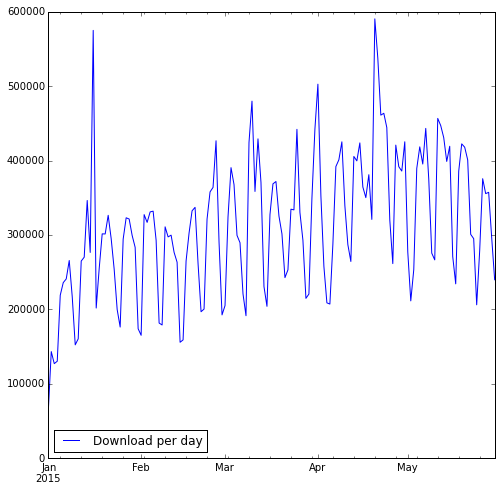

In [26]:
count_downl_by_day.plot(figsize=(8,8))

In [27]:
roots = [line.strip() for line in open("fileserver002/packages_roots", 'r')]
len(roots)

18716714

In [28]:
roots[:20]

['1985',
 '5219',
 '3556',
 '5441',
 '5161',
 '4911',
 '3505',
 '4629',
 '2582',
 '1833',
 '655',
 '1023',
 '7008',
 '576',
 '5033',
 '3947',
 '5326',
 '3345',
 '2137',
 '5635']

In [29]:
import csv
reader = csv.reader(open('dict_Packages_indexto_Value.txt', 'rb'))
listPackages_valueto_index2 = dict(x for x in reader)
listPackages_valueto_index2

{'5988': 'smart',
 '5989': 'SmarterPoland',
 '5982': 'sm',
 '5983': 'smaa',
 '5980': 'SLOPE',
 '5981': 'slp',
 '5986': 'smacpod',
 '5987': 'smam',
 '5984': 'smac',
 '5985': 'smacof',
 '6796': 'UPMASK',
 '6797': 'UpSetR',
 '6794': 'upclass',
 '6795': 'uplift',
 '6792': 'unmarked',
 '6793': 'untb',
 '6790': 'uniReg',
 '6791': 'unittest',
 '6798': 'urca',
 '6799': 'urltools',
 '6294': 'StatMatch',
 '270': 'autopls',
 '271': 'AutoSEARCH',
 '272': 'autovarCore',
 '273': 'aws',
 '274': 'awsMethods',
 '275': 'aylmer',
 '276': 'AzureML',
 '277': 'B2Z',
 '278': 'b6e6rl',
 '279': 'babar',
 '2143': 'gdm',
 '2142': 'gdistance',
 '3519': 'MigClim',
 '3518': 'midasr',
 '3513': 'micromap',
 '3512': 'MicroDatosEs',
 '3511': 'microbenchmark',
 '3510': 'micEconSNQP',
 '3517': 'MicSim',
 '3516': 'MicroStrategyR',
 '3515': 'micropan',
 '3514': 'micromapST',
 '2688': 'ica',
 '2689': 'ICAFF',
 '2684': 'iC10',
 '2685': 'iC10TrainingData',
 '2686': 'IC2',
 '2687': 'ic50',
 '2680': 'Iboot',
 '2681': 'ibr',
 '2

In [30]:
roots_name = []
for ind_root in roots:
    try:
        
        name_package = listPackages_valueto_index2[ind_root]
        roots_name.append(name_package)
    except:
        roots_name.append(ind_root)

In [31]:
roots_name[:10]

['fpc',
 'rggobi',
 'missMDA',
 'rpart.plot',
 'reshape',
 'rattle',
 'mice',
 'pROC',
 'Hmisc',
 'fBasics']

In [89]:
from collections import Counter
words_to_count = (word for word in roots_name if word[:1].isupper())
c = Counter(words_to_count)
print len(c), c['CRAC']
most_common_packages = c.most_common(20)
print c.most_common(20)

2755 1423
[('RcppEigen', 179966), ('BH', 139863), ('Hmisc', 98881), ('XML', 92429), ('RCurl', 83775), ('RcppArmadillo', 82178), ('RJSONIO', 79502), ('KernSmooth', 76151), ('RODBC', 63510), ('XLConnect', 62884), ('RColorBrewer', 54961), ('MASS', 51419), ('Rcmdr', 41918), ('ROCR', 40942), ('RSQLite', 36296), ('RMySQL', 35347), ('Rcpp', 34884), ('R.utils', 25316), ('UsingR', 22848), ('ISLR', 22813)]


In [62]:
print "Our teacher's, Jason, cosmology package CRAC has been downloaded %s times between January and May 2015" % c['CRAC']

Our teacher's, Jason, cosmology package CRAC has been downloaded 1423 times between January and May 2015


In [81]:
for rank in range(2755):
    if c.most_common(2755)[rank][0]=='CRAC':
        break
print "Following the methodology described in the blog, our teacher's package is ranked %s th" % (rank+1)

Following the methodology described in the blog, our teacher's package is ranked 1170 th


In [92]:
most_common_packages_names = [x[0] for x in most_common_packages]
most_common_packages_names[:10]

['RcppEigen',
 'BH',
 'Hmisc',
 'XML',
 'RCurl',
 'RcppArmadillo',
 'RJSONIO',
 'KernSmooth',
 'RODBC',
 'XLConnect']

In [93]:
most_common_packages_dld_nb = [x[1] for x in most_common_packages]
most_common_packages_dld_nb[:10]

[179966, 139863, 98881, 92429, 83775, 82178, 79502, 76151, 63510, 62884]

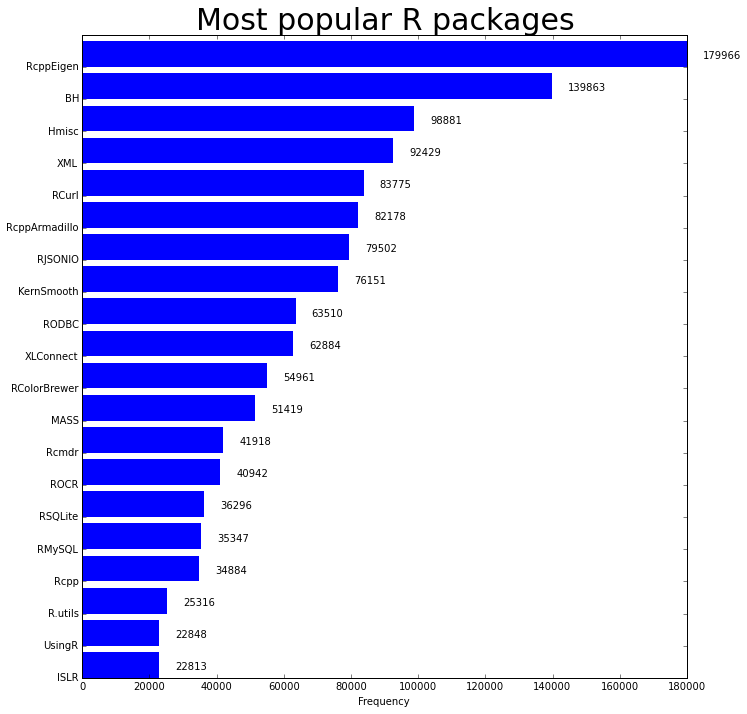

In [105]:
freq = most_common_packages_dld_nb[::-1]
names = most_common_packages_names[::-1]

y_pos = np.arange(len(most_common_packages_dld_nb))
plt.figure(num=None, figsize=(10, 10))
plt.barh(y_pos, freq,edgecolor=None,linewidth = 0)
plt.yticks(y_pos, names)
plt.xlabel('Frequency')
plt.title('Most popular R packages', fontsize=30)
for i in range(len(names)):
    plt.text(freq[i] + 5000, i+0.25,  freq[i]) # add number
plt.tight_layout()
plt.show()